# Data visualization Car Sales

### O obejtivo desse projeto é realizar uma análise exploratória diante da base de dados "carSales" que contém várias informações quantitativas e qualitativas sobre vendas de veículos usados. Iremos realizar o clássico processo de Preparação, Processamento, Transformação, Análise e Visualização das informações e insights obtidos com a análise exploratória.

## 1)Importando Bibliotecas

In [1]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd 
import missingno as msno 
import pandasql as ps

## 2) Importando e explorando a base de dados

Nessa etapa, iremos realizar um processo inicial de análise do nosso dataset, entendendo quais variáveis ele possui e também quais são as "limpezas" que serão necessárias.
Optei por usar a biblioteca pandasql que permite realizar queries em SQL nos dataframes do nosso notebook para criar alguns datasframes que utilizaremos a frente.

In [2]:
carSales=pd.read_csv("/kaggle/input/car-sales/Car_sales.csv")
q1 = """SELECT Manufacturer, SUM(Sales_in_thousands) FROM carSales GROUP BY Manufacturer ORDER BY SUM(Sales_in_thousands) DESC"""
q2 = ps.sqldf(q1, locals())
q3 = """SELECT Manufacturer, AVG(__year_resale_value) FROM carSales GROUP BY Manufacturer ORDER BY AVG(__year_resale_value) DESC"""
q4 = ps.sqldf(q3, locals())

In [3]:
 carSales.head(8)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
6,Audi,A8,1.380,39.000,Passenger,62.00,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,134.656858
7,BMW,323i,19.747,NaN,Passenger,26.99,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,6/28/2011,71.191207


In [4]:
 carSales.tail(8)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
149,Volkswagen,GTI,5.596,13.76,Passenger,17.5,2.0,115.0,98.9,68.3,163.3,2.762,14.6,26.0,4/1/2011,47.946841
150,Volkswagen,Beetle,49.463,NaN,Passenger,15.9,2.0,115.0,98.9,67.9,161.1,2.769,14.5,26.0,10/20/2011,47.329632
151,Volvo,S40,16.957,NaN,Passenger,23.4,1.9,160.0,100.5,67.6,176.6,2.998,15.8,25.0,2/18/2011,66.113057
152,Volvo,V40,3.545,NaN,Passenger,24.4,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.5,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.8,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.5,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357
156,Volvo,S80,18.969,NaN,Passenger,36.0,2.9,201.0,109.9,72.1,189.8,3.600,21.1,24.0,11/14/2011,85.735655


In [5]:
carSales.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [6]:
carSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

## 3) Visualização dos dados

Nessa etapa, primeiramente iremos plotar dois gráficos que trazem de uma maneira muito intuitiva a quantidade de dados faltantes (Nan) em todo nosso dataset. No caso desse dataset, não iremos excluir as observações que contém valores faltantes.

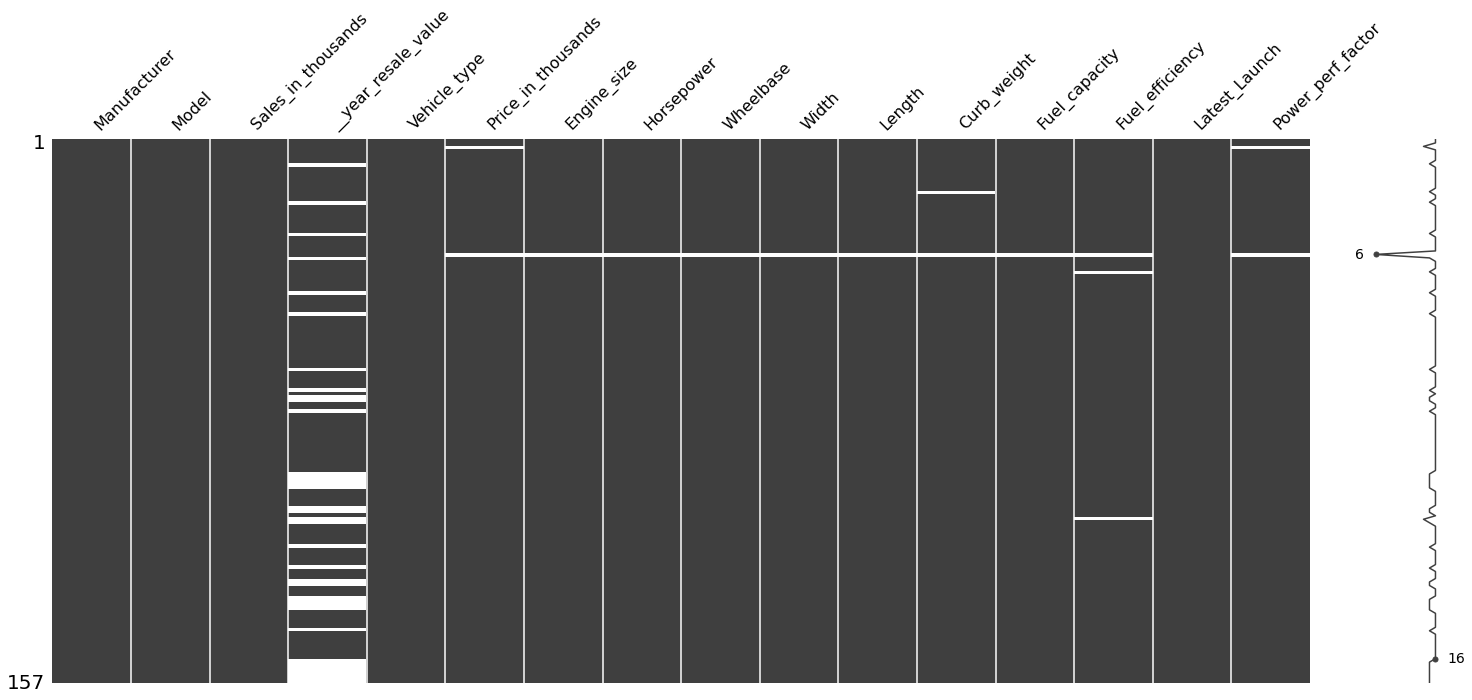

In [7]:
msno.matrix(carSales)
plt.show()

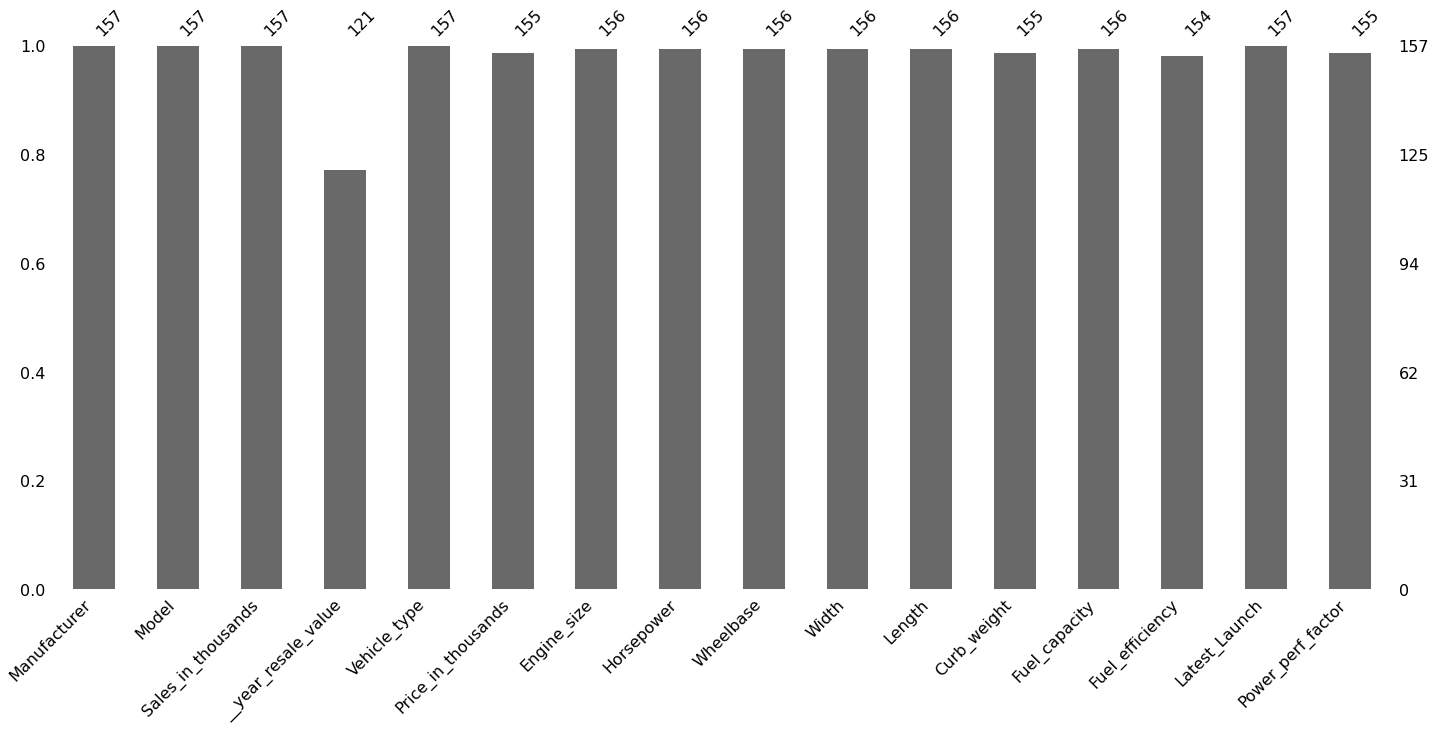

In [8]:
msno.bar(carSales)
plt.show()

A seguir, iremos plotar vários histogramas que irão ajudar a entender como as variáveis estão distribuidas ao longo do dataset.

In [9]:
trace=go.Histogram(
    x=carSales.Power_perf_factor)
    
layout = go.Layout(
    title={
        'text':'Power perfomance factor Histogram',
        'y':0.9,
        'x':0.5,
        'xanchor': 'left',
        'yanchor': 'top' 
        },          
    bargap=0.1,
    xaxis=dict(title='Power perf factor'),
    yaxis=dict( title='Count'),
)

fig = go.Figure(data=trace, layout=layout)
fig.update_traces(opacity=0.85)

iplot(fig)


In [10]:
fig = px.histogram(carSales,
                   x='Power_perf_factor',
                   marginal='box',
                   title='Distribution of Power Perform Factor',
                   )
fig.update_layout(bargap=0.1)
fig.show()

In [11]:
fig=px.histogram(carSales,
                 x="__year_resale_value",
                 marginal="box",
                 title='Distribution of Year Resale Value',
    )
fig.update_layout(bargap=0.1)
fig.show()

In [12]:
fig=px.histogram(carSales,
                 x="Sales_in_thousands",
                 marginal="box",
                 title='Distribution of Sales in Thousansds',
    )
fig.update_layout(bargap=0.1)
fig.show()

In [13]:

fig = px.histogram(carSales,
                   x='Price_in_thousands',
                   marginal='box',
                   title='Distribution of Year Resale Value')
fig.update_layout(bargap=0.1)
fig.show()

A matrix de correlação abaixo considera apenas as variáveis quantitativas e realiza o calcúlo da correlação de Pearson para cada uma dessas variáveis. Valores próximos de 1 indicam um correlação positiva forte, e valore próximos de -1 indicam um correlação negativa forte.

<AxesSubplot:>

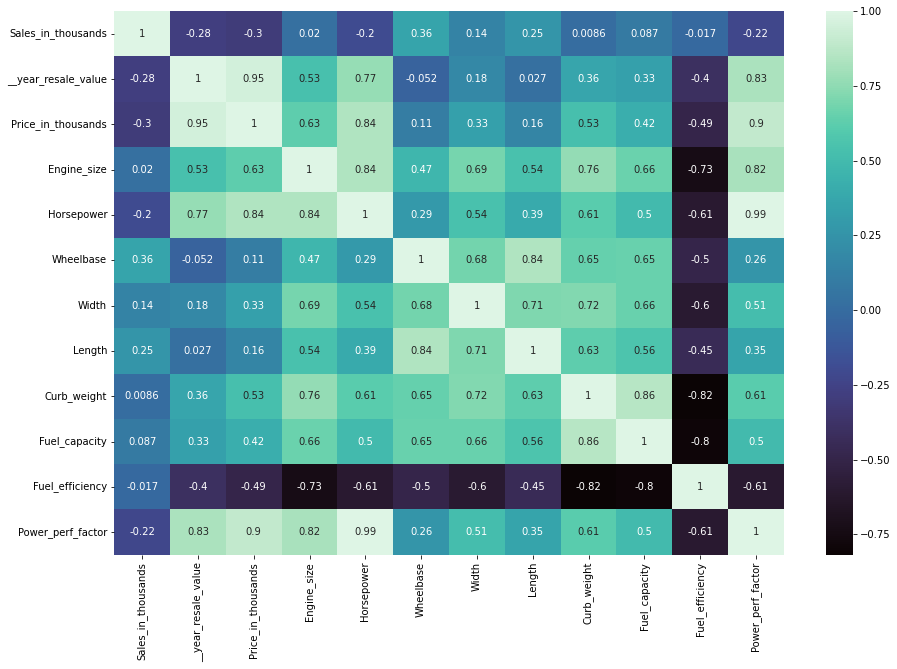

In [14]:
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(carSales.corr(), cmap="mako",annot=True)

Abaixo, temos alguns gráficos de pontos e barras que nos ajudaram a visualizar melhor alguns insights da nossa base de dados. 

Vemos gráficos de pontos que mostram a correlação positiva entre Power_Performance-Price e Horsepower-Price.

In [15]:
fig = px.scatter(carSales,
                 x='Power_perf_factor',
                 y='Price_in_thousands',
                 color='Model',
                
                 hover_data=['Price_in_thousands'],
                 title='Power_Performance - Price')
fig.update_traces(marker_size=5)
fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font_color':'rgba(0, 153, 0,0.5)'})
fig.show()

In [16]:
trace=go.Scatter(
    x=carSales.__year_resale_value,
    y=carSales.Price_in_thousands,
    mode='markers',
    marker =dict(color=carSales.Power_perf_factor,size=(carSales.Sales_in_thousands/10),sizemin=4),
    text=(carSales.Model))

data = [trace]
layout = dict(title = 'Year resale value vs Price_in_thousands',
              xaxis= dict(title= 'year_resale_value',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Price_in_thousands',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [17]:
fig = px.scatter(carSales,
                 x='Horsepower',
                 y='Price_in_thousands',
                 title='HorsePower vs. Price in Thousands')
fig.update_traces(marker_size=5)
fig.show()

Abaixo, plotamos dois gráficos de barras que nos ajudam a entender qual marca teve o maior valor monetário total em vendas e qual marca teve a maior média de valor de venda por veículo.

In [18]:
fig = px.bar(q2,
                 x='Manufacturer',
                 y='SUM(Sales_in_thousands)',
                 title='Car brand year resale',
                color = 'Manufacturer')
fig.show()

In [19]:
fig = px.bar(q4,
                 x='Manufacturer',
                 y='AVG(__year_resale_value)',
                 title='Car brand year resale ratio',
                 color="Manufacturer")
fig.update_traces()
fig.show()

Cerca de 60,3% do valor total do faturamento do período analisado foram devido às vendas dos veículos do tipo "Passenger", enquanto 39,7% das vendas foram realizadas com o tipo de veículo "Car", como o gráfico de pizza abaixo mostra.

In [20]:
fig = px.pie(carSales, values='Sales_in_thousands', names='Vehicle_type', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Desse modo, concluimos nossa análise exploratória da base de dados "Car Sales", onde vimos como o poder da visualição dos dados pode nos ajudar a retirar informações valiosas dos dados.